# OASIS INFOBYTE DATASCIENCE INTERNSHIP
## TASK 4 - EMAIL SPAM DETECTION WITH MACHINE LEARNING
## AUTHOR - RITIKA ROY CHOWDHURY

### INCLUDING REQUIRED PACKAGES

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### LOADING REQUIRED DATASET

In [27]:
df = pd.read_csv("Downloads/spam_email.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
#finding null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [29]:
#dropping null values
df1 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df1.rename(columns = {"v1" : "Spam or Ham", "v2":"Mail Message"},inplace = True)
df1.head()

,Spam or Ham,Mail Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df1.shape

(5572, 2)

In [32]:
#Converting the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Spam or Ham'] = encoder.fit_transform(df1['Spam or Ham'])

In [33]:
#Finding duplicates
df1.duplicated().sum()

403

In [34]:
#dropping duplicates
df1 = df1.drop_duplicates(keep = 'first')

In [35]:
df1.duplicated().sum()

0

In [36]:
#Splitting the data
X =  df1["Mail Message"]
y =df1["Spam or Ham"]

In [37]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [38]:
# Convert the text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### MULTINOMIAL-NB MODELING

In [39]:
#Fitting multinomial naive bayes 
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [40]:
from sklearn.metrics import confusion_matrix , recall_score , precision_score
from sklearn.metrics import accuracy_score

In [41]:
#Testing  the mail (spam/ham)

mail_ham = ['Same. Wana plan a trip sometme then']
mail_ham_count = cv.transform(mail_ham)
y_pred = model.predict(mail_ham_count)
y_pred

array([0])

In [42]:
#finding accuracy of the training dataset
model.score(X_train_count,y_train)

0.9929866989117292

In [43]:
#finding accuracy of the test dataset
X_test_count = cv.transform(X_test)
model.score(X_test_count,y_test)

0.9816247582205029

In [44]:
#dropping null values
df2 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
df2.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
#rename columns
df2.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df2

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [47]:
#converting target column values into numbers
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df2['target']=encoder.fit_transform(df2['target'])
df2['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [48]:
df2

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [49]:
df2.isnull().sum()

target    0
text      0
dtype: int64

In [50]:
df2.duplicated().sum()

403

In [51]:
df2.drop_duplicates(keep='first', inplace=True)
df2.duplicated().sum()

0

In [52]:
df2.shape

(5169, 2)

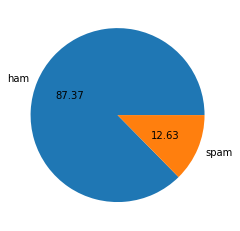

In [53]:
import matplotlib.pyplot as plt
plt.pie(df2['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [55]:
# splitting the data into X and y
X=df2['text'].values
y=df2['target'].values

In [56]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

In [57]:
# converting string into integer
cv = CountVectorizer()
X_train=cv.fit_transform(X_train)
X_test=cv.transform(X_test)

### SVC MODELING

In [58]:
from sklearn.svm import SVC
classifier= SVC(kernel='rbf', random_state=0)
#fitting training set into the classifier
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [59]:
# checking the accuracy of the model
classifier.score(X_test, y_test)

0.9777562862669246

# THANK YOU